# Introduction

Handling the various data types and missing data can be one of the trickier parts of data manipulation until you've had some practice. Fortunately, this is the right place to get that practice.

# Relevant Resources
* **[Data Types and Missing Values Reference](https://www.kaggle.com/residentmario/data-types-and-missing-data-reference). **

# Set Up
**First, fork this notebook using the "Fork Notebook" button towards the top of the screen.**
Run the cell below to load your data and the necessary utility functions

In [103]:
import pandas as pd
import seaborn as sns
reviews = pd.read_csv("../input/wine-reviews/winemag-data-130k-v2.csv", index_col=0)
pd.set_option('max_rows', 5)

import sys
sys.path.append('../input/advanced-pandas-exercises/')
from data_types_missing_data import *


## Checking your answers

You can check your answers in each of the exercises that follow using the  `check_qN` function provided in the code cell above (replacing `N` with the number of the exercise). For example here's how you would check an incorrect answer to exercise 1:

In [104]:
check_q1(pd.DataFrame())

False

For the first set of questions, if you use `check_qN` on your answer, and your answer is right, a simple `True` value will be returned.

For the second set of questions, using this function to check a correct answer will present you will an informative graph!

If you get stuck, use the companion `answer_qN` function to print the answer.

# Exercises

**Exercise 1**: What is the data type of the `points` column in the dataset?

In [105]:
print (check_q1(reviews['points'].dtype), '\n\n', reviews['points'].dtype)

True 

 int64


**Exercise 2**: Create a `Series` from entries in the `price` column, but convert the entries to strings. Hint: strings are `str` in native Python.

In [106]:
temp = reviews.price.astype('str')
print (check_q2(temp), '\n\n', temp)

0         True
1         True
          ... 
129969    True
129970    True
Name: price, Length: 129971, dtype: bool 

 0          nan
1         15.0
          ... 
129969    32.0
129970    21.0
Name: price, Length: 129971, dtype: object


Here are a few visual exercises on missing data.

**Exercise 3**: Wines are something missing prices. How often does this occur? Generate a `Series`that, for each review in the dataset, states whether or not the wine reviewed has a non-null `price`.

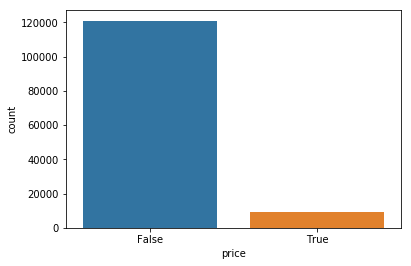

In [107]:
check_q3(reviews['price'].isna())

**Exercise 4**: What are the most common wine-producing regions? Create a `Series` counting the number of times each value occurs in the `region_1` field. This field is often missing data, so replace missing values with `Unknown`. Sort in descending order. Your output should look something like this:

```
Unknown                    21247
Napa Valley                 4480
                           ...  
Bardolino Superiore            1
Primitivo del Tarantino        1
Name: region_1, Length: 1230, dtype: int64
```

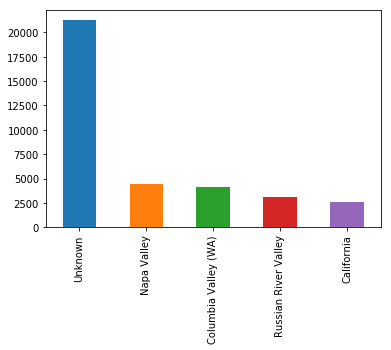

In [108]:
temp = reviews['region_1']
temp = temp.fillna('Unknown')
check_q4(temp.value_counts())

**Exercise 5**: Now for something more challenging. Although the dataset doesn't include a specific field for this information, many of the wines reviewed by are from a series of wines specific to a given growing season and hence, year (or "vintage"). For aficionados, significant differences exist between wines of different vintages. The `title` of the wine often mentions the vintage.

Create a `Series` showing, for each wine, what vintage (year) the wine comes from. Do this by extracting the year, if one occurs, from the `title` field of the dataset. Report wines missing vintages as `N/A`. Sort the values in ascending order (e.g. earlier years before later ones).

Hint: write a map that will extract the vintage of each wine in the dataset. The vintages reviewed range from 2000 to 2017, no earlier or later. Use `fillna` to impute the missing values.

In [109]:
import re

def year_return(title):
    year = re.search('(200[0-9]|201[0-7])', title)
    if year:
        return year.group(0)
    else:
        return None

In [110]:
def find_year(description):
    if "20" in description:
        idx = description.index("20")
        maybe_date = description[idx:idx + 4]
        if maybe_date.isdigit():
            return maybe_date
        else:
            return None
    else:
        return None

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


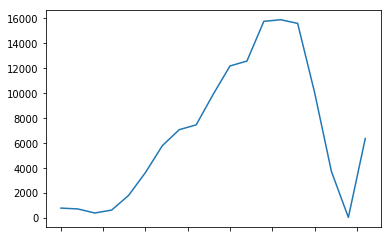

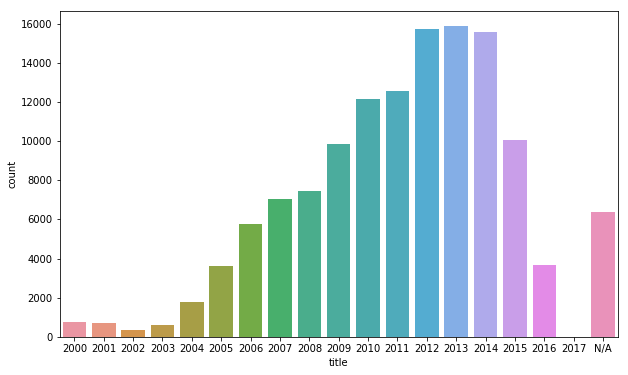

In [111]:
vintage_list = reviews.title.map(year_return)
vintage_list = vintage_list.fillna('N/A').sort_values()
temp = reviews.title.map(find_year).fillna("N/A").sort_values()
print (vintage_list.value_counts().sort_index().plot())
print (check_q5(temp))

# Keep going

Move on to the [**Renaming and combining workbook**](https://www.kaggle.com/residentmario/renaming-and-combining-workbook)